In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
figsize = (24, 8)

In [4]:
filename = 'AgeDatasetClean.csv'
df = pd.read_csv(filename,sep='|')
df

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...,...
732956,Wim de Vreng,Dutch swimmer,Male,Kingdom of the Netherlands,Athlete,1930,1980.0,50.0
732957,James Smillie,goudsmid uit Schotland (1784-1841),Male,Scotland,Goldsmith,1784,1841.0,57.0
732958,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,67.0
732959,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,28.0


# Longevidade

<img src='27anoss.jpg' width='750px'>

Contrariando ~~ou não~~ a teoria de que os mais talentosos morrem aos 27 anos, uma coisa é certa, a idade campeão de mortes entre as personalidades é com 80 anos e a Ocupação/profissão seria atletas.

In [5]:
club_27 = df[df['Age of death'] == 27]['Occupation'].value_counts()[:10]
club_27

Athlete               413
Artist                361
Military personnel    311
Politician            110
Researcher             43
Aristocrat             28
Religious figure       23
Flying ace             17
Engineer               13
Journalist             10
Name: Occupation, dtype: int64

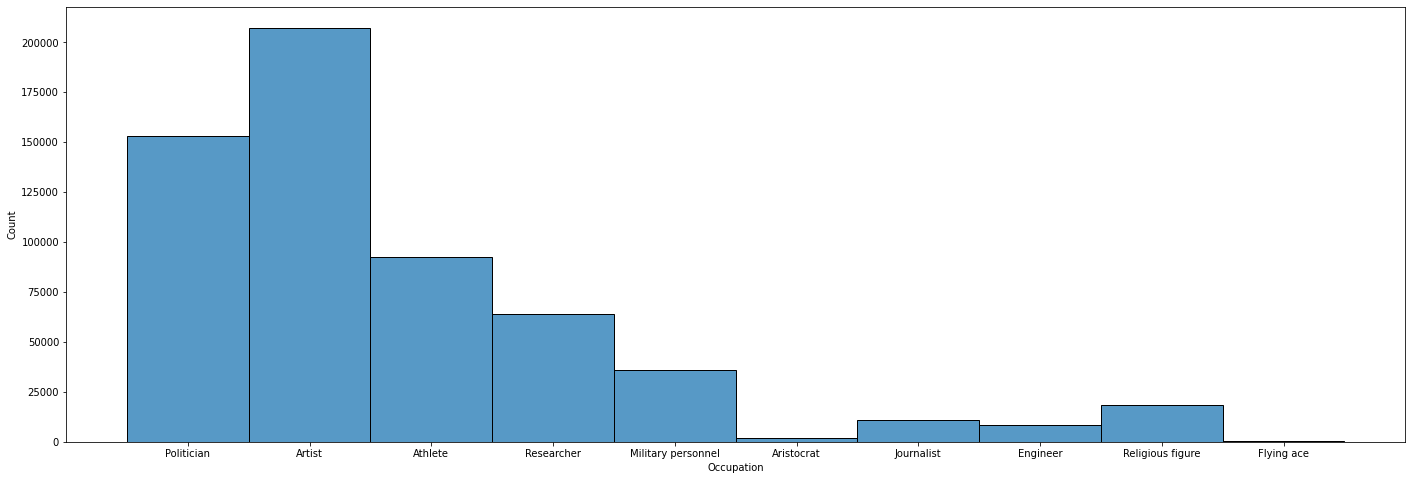

In [6]:
plt.figure(figsize=figsize)

df_club_27 = df[df.Occupation.isin(club_27.index)]
sns.histplot(df_club_27, x=df_club_27.Occupation)

# Mostra o nosso Gráfico
plt.show()

# Ocupação

In [7]:
top_occupation = df['Occupation'].value_counts()[:10]
top_occupation

Artist                207322
Politician            152916
Athlete                92645
Researcher             63799
Military personnel     36025
Religious figure       18538
Architect              12588
Businessperson         12108
Journalist             10929
Teacher                10769
Name: Occupation, dtype: int64

In [8]:
df_occupation = df[df.Occupation.isin(top_occupation.index)]

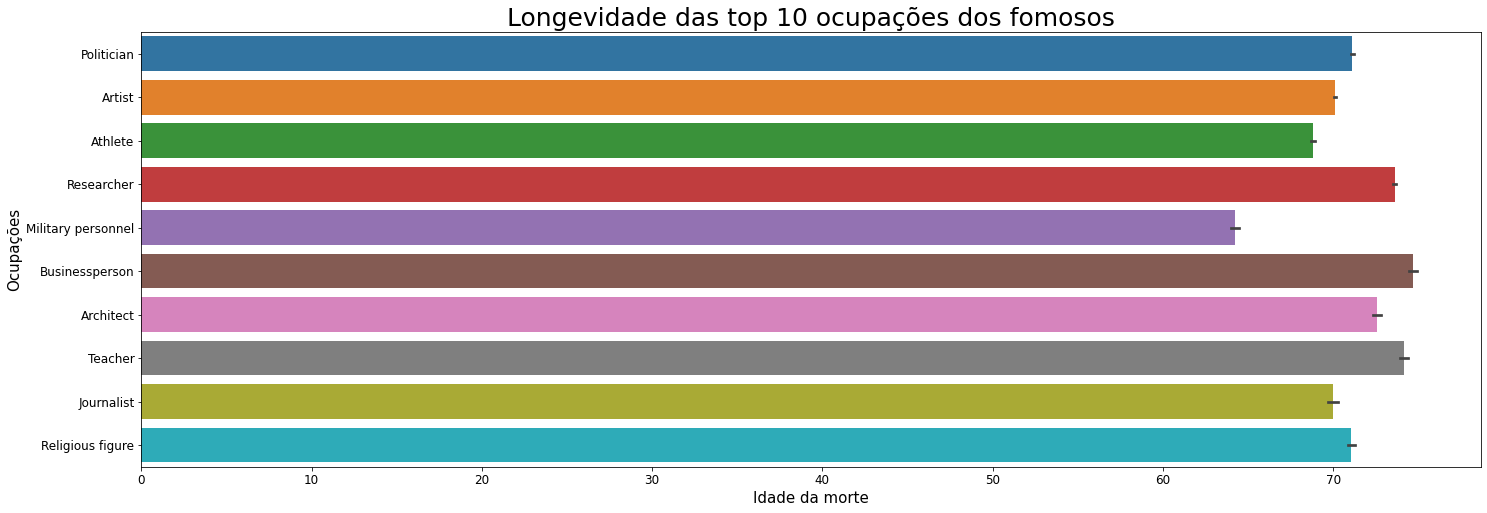

In [10]:
# Ajustando o tamanho da Figura

plt.figure(figsize=figsize) ## Tamanho da figura em polegadas

sns.barplot(data=df, y=df_occupation.Occupation, x='Age of death')

# Coloca o titulo
plt.title('Longevidade das top 10 ocupações dos fomosos', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Idade da morte', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Ocupações', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize=12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize=12)

# Mostra o nosso Gráfico
plt.show()


# Gênero

Mulheres vivem mais que homens?

In [19]:
## Alterando para Others os genêros diferentes de Male ou Female
gender_others = (df['Gender'] != 'Male') & (df['Gender'] != 'Female')
df.loc[gender_others, 'Gender'] = 'Others'

In [20]:
## A gente pode visualizar por sexo a media e mediana da idade que os artistas faleceram
df_age = df.groupby(['Gender'])['Age of death'].agg(['mean', 'median'])
df_age

,mean,median
Gender,,
Female,72.717995,77.0
Male,70.103269,73.0
Others,56.551181,60.0


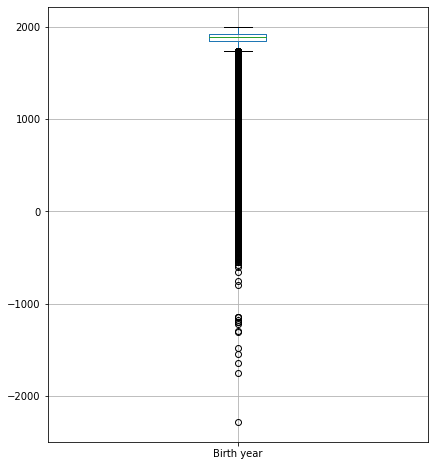

In [29]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
df.boxplot(['Birth year'])
plt.show()

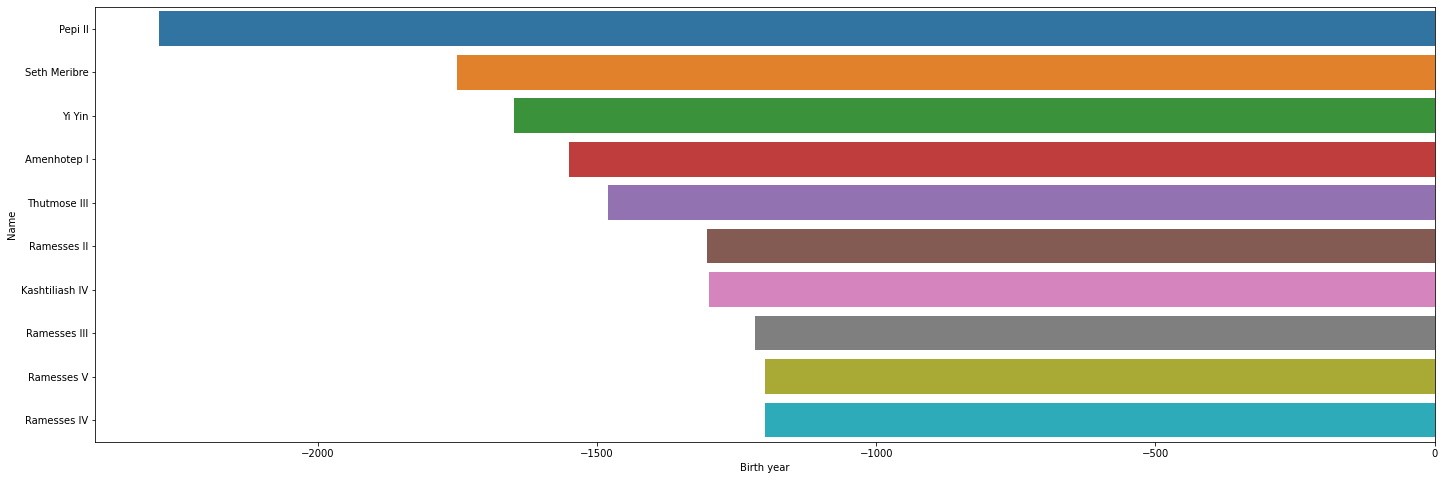

In [46]:
df_old = df[df['Birth year'] < 0].sort_values('Birth year')[:10]

plt.figure(figsize=figsize)

sns.barplot(data=df_old, y=df_old.Name, x='Birth year')

plt.show()

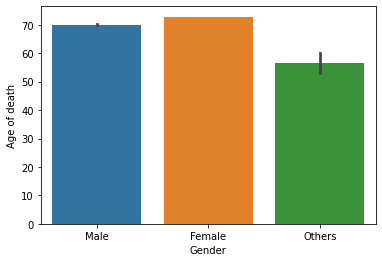

In [30]:
sns.barplot(data=df, x='Gender', y='Age of death')

plt.show()